# Analysis of datasets from hospital management system

## Synthetic Datasets from kaggle that shows group of patient records on their basic demographic as well as medical parameters

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('My app').getOrCreate()

In [3]:
# opening dataset from hospital management system
df = spark.read.csv(r"C:\Users\jusep\OneDrive\Desktop\dataset.csv",header=True,inferSchema=True)

In [4]:
df.show()

+----------+---+------+--------+---------+---------+----+-----------------------+------------------------+-----------------+---------------+---------------+------+--------+-------------+--------------------+--------------------+
|patient_id|age|gender|    race|height_cm|weight_kg| bmi|blood_pressure_systolic|blood_pressure_diastolic|cholesterol_total|cholesterol_hdl|cholesterol_ldl|smoker|diabetes|heart_disease|         medications|         procedures |
+----------+---+------+--------+---------+---------+----+-----------------------+------------------------+-----------------+---------------+---------------+------+--------+-------------+--------------------+--------------------+
|         1| 45|     M|   White|      180|       90|27.8|                    130|                      85|              200|             50|            130|     1|       0|            0|lisinopril;metformin|        appendectomy|
|         2| 62|     F|   Black|      165|       72|26.4|                    145|   

### Descriptive summary of total cholesterol measurements

In [6]:
df.select('cholesterol_total').describe().show()

+-------+-----------------+
|summary|cholesterol_total|
+-------+-----------------+
|  count|               10|
|   mean|            201.0|
| stddev|33.81321240777535|
|    min|              150|
|    max|              260|
+-------+-----------------+



### Descriptive summary of patients' age 

In [7]:
# Summary statistics of Age attributes of patient
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|                10|
|   mean|              51.4|
| stddev|13.268174118711453|
|    min|                28|
|    max|                71|
+-------+------------------+



 Average age of patients is 51.4 years with standard deviation of 13yrs. Maximum age is 71yrs and lowest age is 28yrs

In [8]:
df.groupBy('gender').mean('age').show()

+------+--------+
|gender|avg(age)|
+------+--------+
|     F|    50.2|
|     M|    52.6|
+------+--------+



Average age for male patients is 52.6 and for females its 50.2 years.

### Comparison of total cholesterol measurement by Gender

In [9]:
df.groupBy('gender').mean('cholesterol_total').show()

+------+----------------------+
|gender|avg(cholesterol_total)|
+------+----------------------+
|     F|                 202.0|
|     M|                 200.0|
+------+----------------------+



### Comparison of systolic pressure measurement by smoking habit

In [10]:
df.groupBy('smoker').mean('blood_pressure_systolic').show()

+------+----------------------------+
|smoker|avg(blood_pressure_systolic)|
+------+----------------------------+
|     1|          138.66666666666666|
|     0|                       129.0|
+------+----------------------------+



There is difference in systolic pressure between smokers and non smokers demonstrating nearly 10mmHg higher in smokers

In [11]:
df.groupBy('smoker').mean('blood_pressure_diastolic').show()

+------+-----------------------------+
|smoker|avg(blood_pressure_diastolic)|
+------+-----------------------------+
|     1|            89.33333333333333|
|     0|            83.14285714285714|
+------+-----------------------------+



There is 5mmHg diastolic blood pressure difference between smokers vs non smokers patients.

### Comparison of Total cholesterol measurement by smoking habit

In [12]:
df.groupBy('smoker').mean('cholesterol_total').show()

+------+----------------------+
|smoker|avg(cholesterol_total)|
+------+----------------------+
|     1|    203.33333333333334|
|     0|                 200.0|
+------+----------------------+



### Converting pyspark dataframe to pandas dataframe to do visualizations

In [16]:
data = df.toPandas()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Scatter plot of Systolic vs Diastolic Pressue measurements

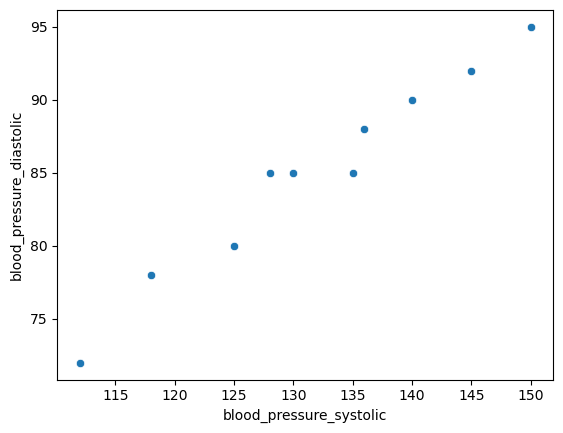

In [17]:
sns.scatterplot(data = data , x= 'blood_pressure_systolic',y='blood_pressure_diastolic');

### Trend of blood pressure measurements with smoking habit

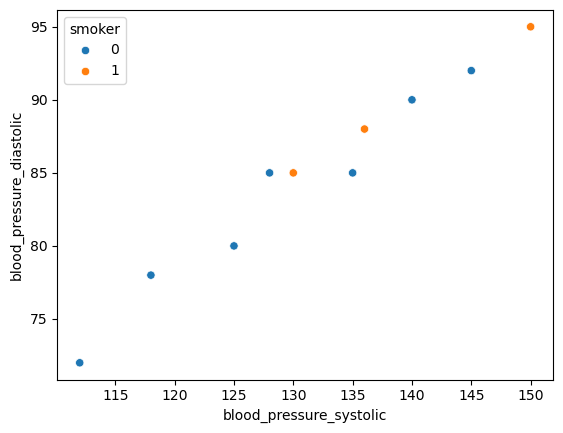

In [18]:
sns.scatterplot(data = data , x= 'blood_pressure_systolic',y='blood_pressure_diastolic',hue = 'smoker');

scatterplot shows linear relation between systolic and diastolic pressure trend and higher readings in patients who smokes cigarretes.

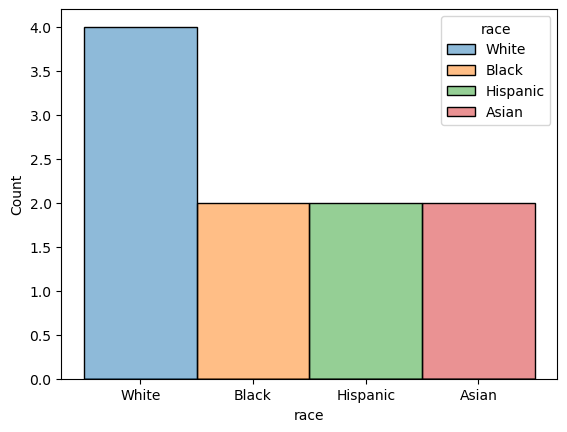

In [19]:
sns.histplot(data = data , x='race',hue='race');

Histogram shows distribution of patients race background depicting higher white races than others